In [62]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [63]:

# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()


Y_train = df_train['income'].values.reshape(-1, 1)


In [64]:
# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [94]:
# create an array of r2 values for both lasso and ridge regression
lambda_list = np.arange(.1,1,.05)
r2_lasso_values = []
r2_ridge_values = []

alpha =.35
lass = linear_model.Lasso(alpha=alpha)
lass.fit(X_train2, Y_train)
lasscore = lass.score(X_train2, Y_train)
print(lasscore)
for alpha in lambda_list:
    lass = linear_model.Lasso(alpha=alpha)
    lass.fit(X_train2, Y_train)
    lasscore = lass.score(X_train2, Y_train)
    r2_lasso_values.append(lasscore)

for alpha_ridge in lambda_list:
    ridgeregr = linear_model.Ridge(alpha=alpha_ridge, fit_intercept=False) 
    ridgeregr.fit(X_train2, Y_train)
    ridgescore = ridgeregr.score(X_train2, Y_train)
    r2_ridge_values.append(ridgescore)
    
#print(r2_lasso_values)
print (lambda_list)
print(r2_ridge_values)

0.443633767129
[ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95]
[0.57397226634096099, 0.57397217939194367, 0.5739720657073708, 0.57397192902634997, 0.57397177259787924, 0.5739715992503156, 0.57397141144921338, 0.57397121134664575, 0.57397100082437613, 0.57397078152835612, 0.57397055490065263, 0.5739703222053425, 0.57397008455176801, 0.57396984291271191, 0.57396959814277659, 0.57396935099194846, 0.57396910211962249, 0.57396885210343873]


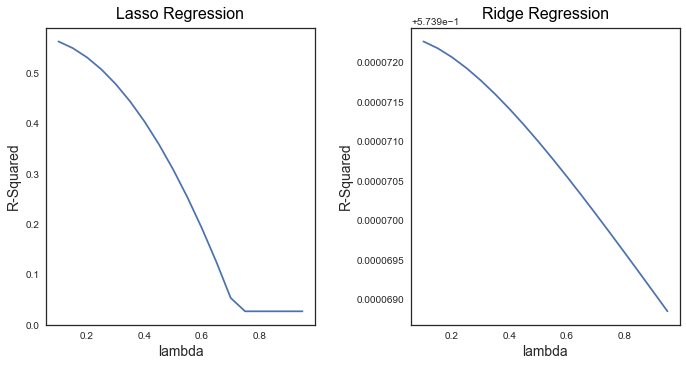

In [101]:
#Create a plot below of how  R2  varies across different values of  λ  for ridge and lasso regression. 
#Use logic and code similar to the ridge regression demonstration above, 
#and base your plot on the X_train2 feature set.

plt.figure(figsize=(10,10))
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

plt.subplot(2,2,1)
plt.plot(lambda_list, r2_lasso_values)
plt.xlabel('lambda', **axis_font)
plt.ylabel('R-Squared', **axis_font)
plt.title('Lasso Regression', **title_font)

plt.subplot(2,2,2)
plt.plot(lambda_list, r2_ridge_values)
plt.xlabel('lambda',  **axis_font)
plt.ylabel('R-Squared',  **axis_font)
plt.title('Ridge Regression', **title_font)
#plt.ylim((.5725,.5750))

plt.tight_layout()
plt.show()